In [0]:
%tensorflow_version 2.x
import tensorflow as tf 
import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualisation


from sklearn.datasets import load_diabetes # dataset
from sklearn.model_selection import train_test_split

In [0]:
# load the dataset
dataset = load_diabetes()

In [0]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [0]:
# As we can see from the description, the data is already normalized and centered so we don't need to process the features
X = dataset.data
Y = dataset.target # Target data: quantitative measure of disease progression one year after baseline

In [0]:
print(X.shape)
print(Y.shape)
all_data = np.concatenate((X, Y.reshape(-1,1)), axis = 1)
columns = np.copy(dataset.feature_names)
columns = np.concatenate((columns, ['Target']), axis = 0)
data_df = pd.DataFrame(all_data, columns = columns)
data_df

(442, 10)
(442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [0]:
data_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [0]:
# Let's take the log of the Target because we want to standard deviation of target data decrease
data_df['Target'] = np.log(data_df['Target'])

In [0]:
print(data_df.describe()) # we can see that standard deviation (std) of target waaaay decreased so i think it'd be better to do log transformation on target data
Y = np.log(Y)

                age           sex  ...            s6      Target
count  4.420000e+02  4.420000e+02  ...  4.420000e+02  442.000000
mean  -3.634285e-16  1.308343e-16  ... -3.412882e-16    4.881323
std    4.761905e-02  4.761905e-02  ...  4.761905e-02    0.558610
min   -1.072256e-01 -4.464164e-02  ... -1.377672e-01    3.218876
25%   -3.729927e-02 -4.464164e-02  ... -3.317903e-02    4.465908
50%    5.383060e-03 -4.464164e-02  ... -1.077698e-03    4.945201
75%    3.807591e-02  5.068012e-02  ...  2.791705e-02    5.354217
max    1.107267e-01  5.068012e-02  ...  1.356118e-01    5.846439

[8 rows x 11 columns]


In [0]:
# Now since we don't need to process our data, we can split it
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3)
N, D = X.shape # we need dimension of X because of the Dense layer in tensorflow model

Train on 309 samples, validate on 133 samples
Epoch 1/200
309/309 - 0s - loss: 8.8339 - val_loss: 8.0867
Epoch 2/200
309/309 - 0s - loss: 3.2468 - val_loss: 3.2979
Epoch 3/200
309/309 - 0s - loss: 1.2399 - val_loss: 1.0568
Epoch 4/200
309/309 - 0s - loss: 0.6019 - val_loss: 0.6562
Epoch 5/200
309/309 - 0s - loss: 0.4228 - val_loss: 0.2898
Epoch 6/200
309/309 - 0s - loss: 0.2878 - val_loss: 0.2865
Epoch 7/200
309/309 - 0s - loss: 0.2672 - val_loss: 0.2133
Epoch 8/200
309/309 - 0s - loss: 0.2296 - val_loss: 0.2230
Epoch 9/200
309/309 - 0s - loss: 0.2269 - val_loss: 0.2079
Epoch 10/200
309/309 - 0s - loss: 0.2174 - val_loss: 0.2032
Epoch 11/200
309/309 - 0s - loss: 0.2123 - val_loss: 0.1983
Epoch 12/200
309/309 - 0s - loss: 0.2091 - val_loss: 0.2043
Epoch 13/200
309/309 - 0s - loss: 0.2043 - val_loss: 0.1910
Epoch 14/200
309/309 - 0s - loss: 0.1999 - val_loss: 0.1954
Epoch 15/200
309/309 - 0s - loss: 0.2001 - val_loss: 0.1948
Epoch 16/200
309/309 - 0s - loss: 0.1953 - val_loss: 0.1872
Epo

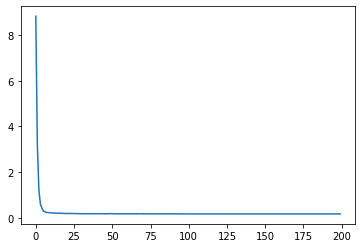

In [0]:
# Now we can create the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (D,))) # we don't use activation function since its a regression problem

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 100:
    return lr - (lr*0.1)

  return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# compiling the model # 
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05, momentum = .9), loss = 'mse')

# fitting the data
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = [scheduler], verbose = 2, epochs = 200)

print('Train Score: ', model.evaluate(X_train,y_train))
print('Test Score: ', model.evaluate(X_test,y_test))

plt.plot(r.history['loss'], label = 'loss')
plt.show()

In [0]:
# Predict the test set and compare with true values
preds = model.predict(X_test).flatten()
# # Backtransform predictions
preds = np.exp(preds)
# Creating a dataframe with absolute error
error = abs(preds - np.exp(y_test))
values = np.concatenate((preds.reshape(-1,1), np.exp(y_test).reshape(-1,1), error.reshape(-1,1)), axis = 1)
predictions = pd.DataFrame(values, columns = ['Predicted Values', 'True Values', 'Absolute Error'])
predictions

,Predicted Values,True Values,Absolute Error
0,64.531029,48.0,16.531029
1,87.556877,55.0,32.556877
2,99.891968,60.0,39.891968
3,125.464058,200.0,74.535942
4,96.022621,97.0,0.977379
...,...,...,...
128,147.142105,66.0,81.142105
129,169.037857,283.0,113.962143
130,109.954330,177.0,67.045670
131,143.147324,216.0,72.852676
